In [1]:
import pandas as pd

df = pd.read_excel (r'/Users/sunqiaoyubing/Downloads/I_Fraud.xlsx')
print(df)



      Month  WeekOfMonth  DayOfWeek     Make AccidentArea DayOfWeekClaimed  \
0       Dec            5  Wednesday    Honda        Urban          Tuesday   
1       Jan            3  Wednesday    Honda        Urban           Monday   
2       Oct            5     Friday    Honda        Urban         Thursday   
3       Jun            2   Saturday   Toyota        Rural           Friday   
4       Jan            5     Monday    Honda        Urban          Tuesday   
...     ...          ...        ...      ...          ...              ...   
15415   Nov            4     Friday   Toyota        Urban          Tuesday   
15416   Nov            5   Thursday  Pontiac        Urban           Friday   
15417   Nov            5   Thursday   Toyota        Rural           Friday   
15418   Dec            1     Monday   Toyota        Urban         Thursday   
15419   Dec            2  Wednesday   Toyota        Urban         Thursday   

      MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  .

In [2]:
# Imports

import glob
import string
import ast

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
from scipy import interp
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

#metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import precision_recall_fscore_support, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

In [3]:
import category_encoders as ce

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [32]:
col_names = ['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex',
             'Month', 'DayOfWeek', 'Make', 'AccidentArea', 'Month', 'DayOfWeek', 'Make', 'MaritalStatus',
             'Fault', 'PolicyType', 'VehicleCategory','VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim',
             'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder','PoliceReportFiled', 'WitnessPresent',
             'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars','BasePolicy']


for col in col_names:
    
    print(df[col].value_counts())   

Jan    1411
May    1367
Mar    1360
Jun    1321
Oct    1305
Dec    1285
Apr    1280
Feb    1266
Jul    1257
Sep    1240
Nov    1201
Aug    1127
Name: Month, dtype: int64
Monday       2616
Friday       2445
Tuesday      2300
Thursday     2173
Wednesday    2159
Saturday     1982
Sunday       1745
Name: DayOfWeek, dtype: int64
Pontiac      3837
Toyota       3121
Honda        2801
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         109
Saab          108
Mercury        83
Saturn         58
Nisson         30
BMW            15
Jaguar          6
Porche          5
Mecedes         4
Ferrari         2
Lexus           1
Name: Make, dtype: int64
Urban    13822
Rural     1598
Name: AccidentArea, dtype: int64
Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
0               1
Name: DayOfWeekClaimed, dtype: int64
Jan    1446
May    1411
Mar    1348
Oct    1339
Jun    1293
Feb

In [4]:
X_1 = df.drop(['FraudFound_P'], axis=1)

In [5]:
encoder = ce.OrdinalEncoder(cols=['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex',
             'Month', 'DayOfWeek', 'Make', 'AccidentArea', 'Month', 'DayOfWeek', 'Make', 'MaritalStatus',
             'Fault', 'PolicyType', 'VehicleCategory','VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim',
             'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder','PoliceReportFiled', 'WitnessPresent',
             'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars','BasePolicy'])


X_1 = encoder.fit_transform(X_1)


<AxesSubplot:>

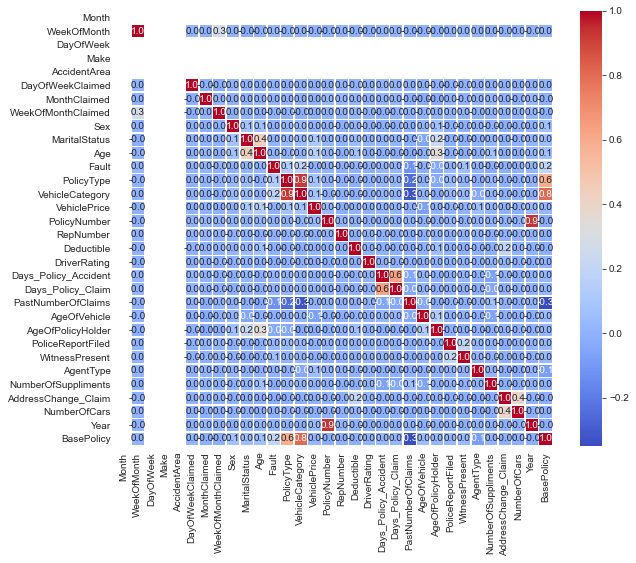

In [37]:
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(X_1.corr(), cmap='coolwarm', annot=True, linewidths=.5, fmt= '.1f',ax =ax,square=True)



In [6]:
df = encoder.fit_transform(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 15420 non-null  float64
 1   WeekOfMonth           15420 non-null  int64  
 2   DayOfWeek             15420 non-null  float64
 3   Make                  15420 non-null  float64
 4   AccidentArea          15420 non-null  float64
 5   DayOfWeekClaimed      15420 non-null  int64  
 6   MonthClaimed          15420 non-null  int64  
 7   WeekOfMonthClaimed    15420 non-null  int64  
 8   Sex                   15420 non-null  int64  
 9   MaritalStatus         15420 non-null  int64  
 10  Age                   15420 non-null  int64  
 11  Fault                 15420 non-null  int64  
 12  PolicyType            15420 non-null  int64  
 13  VehicleCategory       15420 non-null  int64  
 14  VehiclePrice          15420 non-null  int64  
 15  FraudFound_P       

In [39]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [7]:
Train, Test = train_test_split(df, test_size=0.2, random_state=25)
Train.shape, Test.shape

((12336, 33), (3084, 33))

In [8]:
Train, Test = train_test_split(df, test_size=0.2, random_state=25)
Train.shape, Test.shape


((12336, 33), (3084, 33))

In [9]:
xset = Train
X_all = xset.drop(['FraudFound_P'], axis=1)
y_all = xset['FraudFound_P']

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


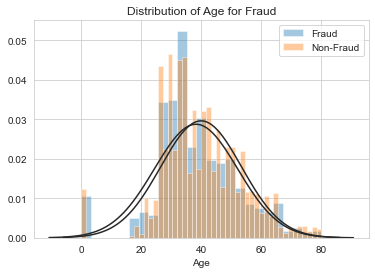

In [15]:
df1 = df[['Age','FraudFound_P']]
Class_ = df1[(df1['FraudFound_P']==1)]
NonClass_ = df1[(df1['FraudFound_P']==0)]
from scipy.stats import norm
ax1 = sns.distplot(Class_['Age'], fit=norm, kde=False,label="Fraud")
ax2 = sns.distplot(NonClass_['Age'], fit=norm, kde=False,label="Non-Fraud")
plt.title('Distribution of Age for Fraud')
plt.legend()

# Feature Selection

In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_Standard = sc.fit_transform(df.drop(['FraudFound_P'], axis=1))

In [43]:
# Feature Extraction with PCA
from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components=5)
fit = pca.fit(df_Standard)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.10003876 0.06975023 0.06185237 0.05820458 0.05098213]
[[ 1.11022302e-16  5.56228637e-03 -6.93889390e-18  0.00000000e+00
  -2.16840434e-19  8.48230470e-03  3.36163390e-03 -9.35052611e-03
   4.97135414e-02  5.75193836e-02  5.02563714e-02  1.75525898e-01
   5.20356432e-01  5.75126985e-01  6.18375050e-02 -3.31656066e-03
  -2.08706456e-03 -1.16733182e-02  1.03438255e-03  4.19631964e-02
   3.87526414e-02 -2.90327744e-01  2.08360385e-02  2.07501125e-03
   3.80802315e-02  3.55383767e-02 -3.65652287e-02  7.22085775e-03
  -8.37104030e-03  1.52202048e-03 -2.07943427e-03  5.12830099e-01]
 [ 1.38777878e-17 -8.86006550e-03 -5.55111512e-17 -0.00000000e+00
  -2.22044605e-16 -1.38092814e-02  4.17553059e-02  1.95847240e-02
   1.49547191e-02  1.05671307e-01  1.20030865e-01  3.80009242e-03
   3.71729967e-03 -4.37589219e-03  8.99566490e-02  6.90816046e-01
   2.47432632e-02  1.44280527e-02 -1.35973031e-02  8.59067702e-03
   2.26143239e-03  1.09884359e-02 -4.23565146e-02  4.35704612e-0

In [44]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.10003876, 0.06975023, 0.06185237, 0.05820458, 0.05098213])

Optimal number of features : 28


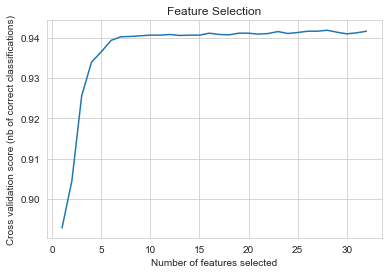

In [24]:
# Create the RFE object and compute a cross-validated score.
model = ExtraTreesClassifier()
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(20),scoring='accuracy')
rfecv.fit(X_all, y_all)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.title('Feature Selection')
plt.show()

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_all, y_all)

#Add features and their importances to a dictionary
feature_imp_dict = dict(zip(X_all.columns.values, model.feature_importances_))

for x in sorted(zip(model.feature_importances_,list(X_all)))[::-1]:
    print (x)

(0.08267518317644704, 'PolicyNumber')
(0.07683579079659829, 'MonthClaimed')
(0.07149971502887463, 'Age')
(0.0714645806665309, 'RepNumber')
(0.06005811494209706, 'DayOfWeekClaimed')
(0.05742507550912218, 'WeekOfMonthClaimed')
(0.05541471174614165, 'AgeOfVehicle')
(0.05470825403841761, 'WeekOfMonth')
(0.052610859775629425, 'DriverRating')
(0.04729502331947115, 'VehiclePrice')
(0.04671536117185592, 'PastNumberOfClaims')
(0.045026662495587164, 'AgeOfPolicyHolder')
(0.04355712718921159, 'NumberOfSuppliments')
(0.03461708022446577, 'Fault')
(0.030180141696926125, 'Year')
(0.028790855422408432, 'MaritalStatus')
(0.02514622512705927, 'BasePolicy')
(0.02507171690144735, 'AddressChange_Claim')
(0.017370759754230067, 'PolicyType')
(0.015929131854379233, 'NumberOfCars')
(0.014721304530744212, 'VehicleCategory')
(0.01447413070860841, 'Deductible')
(0.013773274946690261, 'Sex')
(0.005084128437454519, 'Days_Policy_Accident')
(0.004653329428703823, 'PoliceReportFiled')
(0.0023118451453791695, 'Days_Po

In [19]:
#define a function to print ROC curves. 
#It should take in only arrays/lists of predictions and outcomes
from sklearn.metrics import roc_curve, auc

def plotUnivariateROC(preds, truth, label_string):
    '''
    preds is an nx1 array of predictions
    truth is an nx1 array of truth labels
    label_string is text to go into the plotting label
    '''
    #Student input code here
    #1. call the roc_curve function to get the ROC X and Y values
    fpr, tpr, thresholds = roc_curve(truth, preds)
    #2. Input fpr and tpr into the auc function to get the AUC
    roc_auc = auc(fpr, tpr)
    
    #we are doing this as a special case because we are sending unfitted predictions
    #into the function
    if roc_auc < 0.5:
        fpr, tpr, thresholds = roc_curve(truth, -1 * preds)
        roc_auc = auc(fpr, tpr)

    #chooses a random color for plotting
    c = (np.random.rand(), np.random.rand(), np.random.rand())

    #create a plot and set some options
    plt.plot(fpr, tpr, color = c, label = label_string + ' (AUC = %0.3f)' % roc_auc)
    

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    
    return roc_auc

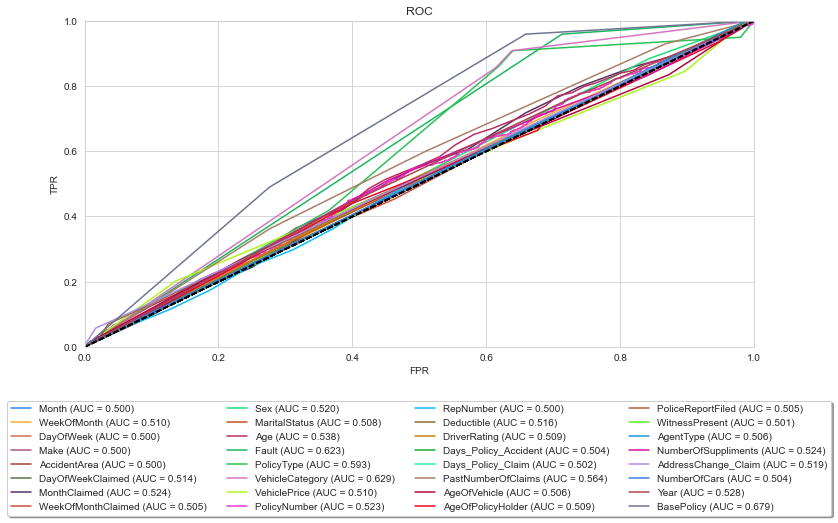

In [22]:
fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(111)

#Plot the univariate AUC on the training data. Store the AUC

#Student put code here
feature_auc_dict = {}
for col in X_all.columns:
    feature_auc_dict[col] = plotUnivariateROC(X_all[col], y_all, col)


# Put a legend below current axis
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.0 , box.width, box.height * 1])
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15), fancybox = True, 
              shadow = True, ncol = 4, prop = {'size':10})

In [26]:
#Add auc and mi each to a single dataframe
df_auc = pd.DataFrame(pd.Series(feature_auc_dict), columns = ['auc'])
df_imp = pd.DataFrame(pd.Series(feature_imp_dict), columns = ['imp'])

#Now merge the two on the feature name
feat_imp_df = df_auc.merge(df_imp, left_index = True, right_index = True)
feat_imp_df

,auc,imp
Month,0.500000,0.000000
WeekOfMonth,0.510099,0.054708
DayOfWeek,0.500000,0.000000
Make,0.500000,0.000000
AccidentArea,0.500000,0.000000
DayOfWeekClaimed,0.513907,0.060058
MonthClaimed,0.524444,0.076836
WeekOfMonthClaimed,0.504894,0.057425
Sex,0.520447,0.013773
MaritalStatus,0.507997,0.028791


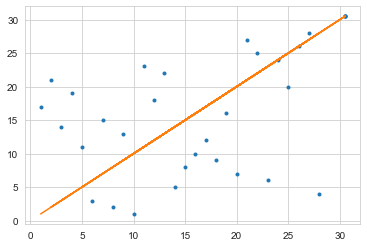

In [49]:
#Now create a df that holds the ranks of auc and mi 
feat_ranks = feat_imp_df.rank(axis = 0, ascending = False)

#Plot the two ranks
plt.plot(feat_ranks.auc, feat_ranks.imp, '.')
#Plot a y=x reference line
plt.plot(feat_ranks.auc, feat_ranks.auc,)

In [50]:
#Now create lists of top 10 features for both auc and mi
top10_auc = list(feat_ranks[(feat_ranks.auc <= 10)].index.values)
top10_imp = list(feat_ranks[(feat_ranks.imp <= 10)].index.values)
for x in zip(top10_auc, top10_imp):
    print (x)

('MonthClaimed', 'WeekOfMonth')
('Age', 'DayOfWeekClaimed')
('Fault', 'MonthClaimed')
('PolicyType', 'WeekOfMonthClaimed')
('VehicleCategory', 'Age')
('PolicyNumber', 'VehiclePrice')
('PastNumberOfClaims', 'PolicyNumber')
('NumberOfSuppliments', 'RepNumber')
('Year', 'DriverRating')
('BasePolicy', 'AgeOfVehicle')


In [51]:
#Now create lists of top 5 features for both auc and mi
top5_auc = list(feat_ranks[(feat_ranks.auc <= 5)].index.values)
top5_imp = list(feat_ranks[(feat_ranks.imp <= 5)].index.values)
for x in zip(top5_auc, top5_imp):
    print (x)

('Fault', 'DayOfWeekClaimed')
('PolicyType', 'MonthClaimed')
('VehicleCategory', 'Age')
('PastNumberOfClaims', 'PolicyNumber')
('BasePolicy', 'RepNumber')


# Modelling Part


In [10]:
ValidSet, test_all = train_test_split(Test, test_size=0.7, random_state=25)
ValidSet.shape, test_all.shape

((925, 33), (2159, 33))

In [11]:
xset = Train
X_all = xset.drop(['FraudFound_P'], axis=1)
y_all = xset['FraudFound_P']

feature1=['Fault','PolicyType','VehicleCategory','PastNumberOfClaims','BasePolicy','DayOfWeekClaimed','MonthClaimed','Age','PolicyNumber','RepNumber']
feature2=['Fault','PolicyType','VehicleCategory','PastNumberOfClaims','BasePolicy','DayOfWeekClaimed','MonthClaimed',
          'Age','PolicyNumber','RepNumber','WeekOfMonth','WeekOfMonthClaimed','VehiclePrice','NumberOfSuppliments',
         'DriverRating','Year','AgeOfVehicle']
  
X_train = xset.drop(['FraudFound_P'], axis=1)
y_train = xset['FraudFound_P']

X_train1 = xset[feature1]
y_train1 = xset['FraudFound_P']
X_train2 = xset[feature2]
y_train2 = xset['FraudFound_P']

X_test = Test.drop(['FraudFound_P'], axis=1)
y_test = Test['FraudFound_P']

X_test1 = Test[feature1]
y_test1 = Test['FraudFound_P']
X_test2 = Test[feature2]
y_test2 = Test['FraudFound_P']

# Decision Tree 

In [45]:
conda env list

# conda environments:
#
base                  *  /Users/sunqiaoyubing/opt/anaconda3


Note: you may need to restart the kernel to use updated packages.


In [111]:
conda install graphviz

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                                                                      |failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - alabaster -> python[version='>=2.7,<2.8.0a0|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.5,<3.6.0a0']
  - anaconda==2021.05 -> python[version='3.7.10|3.9.4|3.8.8',build='h88f2d9e_0|h88f2d9e_5']
  - appdirs -> python[version='>=2.7,<2.8.0a0|>=3.5,<3.6.0a0|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0']
  - argon2-cffi -> python[ve

r-htmltools -> r-base[version='>=3.6,<3.7.0a0'] -> xz[version='5.2.*|>=5.2.3,<6.0a0|>=5.2.4,<6.0a0']
jedi -> python[version='>=3.9,<3.10.0a0'] -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
cytoolz -> python[version='>=3.10,<3.11.0a0'] -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
appdirs -> python -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
python-dateutil -> python -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
sphinxcontrib -> python[version='>=3.10,<3.11.0a0'] -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
libtiff -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
numpy -> python[version='>=3.10,<3.11.0a0'] -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
autopep8 -> python -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
backports -> python -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
graphviz -> cairo[version='>=1.14.12,<2.0a0'] -> xz[version='>=5.2

numpy -> python[version='>=3.10,<3.11.0a0'] -> readline[version='7.*|>=7.0,<8.0a0|>=8.0,<9.0a0']
tifffile -> python[version='>=3.7'] -> readline[version='7.*|>=7.0,<8.0a0|>=8.0,<9.0a0']
kiwisolver -> python[version='>=3.9,<3.10.0a0'] -> readline[version='7.*|>=7.0,<8.0a0|>=8.0,<9.0a0']
pyyaml -> python[version='>=3.8,<3.9.0a0'] -> readline[version='7.*|>=7.0,<8.0a0|>=8.0,<9.0a0']
gmpy2 -> python[version='>=3.10,<3.11.0a0'] -> readline[version='7.*|>=7.0,<8.0a0|>=8.0,<9.0a0']
cffi -> python[version='>=3.10,<3.11.0a0'] -> readline[version='7.*|>=7.0,<8.0a0|>=8.0,<9.0a0']
qtconsole -> python[version='>=3.6'] -> readline[version='7.*|>=7.0,<8.0a0|>=8.0,<9.0a0']
r-reshape2 -> r-base[version='>=3.6,<3.7.0a0'] -> readline[version='7.*|>=7.0,<8.0a0']
scikit-image -> python[version='>=3.10,<3.11.0a0'] -> readline[version='7.*|>=7.0,<8.0a0|>=8.0,<9.0a0']
r-catools -> r-base[version='>=3.6,<3.7.0a0'] -> readline[version='7.*|>=7.0,<8.0a0']
gensim -> python[version='>=3.7,<3.8.0a0'] -> readline[ve

webencodings -> python[version='>=3.10,<3.11.0a0'] -> libffi[version='3.2.*|>=3.2.1,<3.3a0|>=3.3,<3.4.0a0|>=3.2.1,<3.3.0a0']
argh -> python[version='>=3.10,<3.11.0a0'] -> libffi[version='3.2.*|>=3.2.1,<3.3a0|>=3.3,<3.4.0a0|>=3.2.1,<3.3.0a0']
watchdog -> python[version='>=3.10,<3.11.0a0'] -> libffi[version='3.2.*|>=3.2.1,<3.3a0|>=3.3,<3.4.0a0|>=3.2.1,<3.3.0a0']
wcwidth -> python -> libffi[version='3.2.*|>=3.2.1,<3.3a0|>=3.3,<3.4.0a0|>=3.2.1,<3.3.0a0']
widgetsnbextension -> python[version='>=3.7,<3.8.0a0'] -> libffi[version='3.2.*|>=3.2.1,<3.3a0|>=3.3,<3.4.0a0|>=3.2.1,<3.3.0a0']
urllib3 -> python[version='<4.0'] -> libffi[version='3.2.*|>=3.2.1,<3.3a0|>=3.3,<3.4.0a0|>=3.2.1,<3.3.0a0']
sphinxcontrib-serializinghtml -> python[version='>=3.5'] -> libffi[version='3.2.*|>=3.2.1,<3.3a0|>=3.3,<3.4.0a0']
unicodecsv -> python[version='>=3.10,<3.11.0a0'] -> libffi[version='3.2.*|>=3.2.1,<3.3a0|>=3.3,<3.4.0a0|>=3.2.1,<3.3.0a0']
packaging -> python[version='>=3.6'] -> libffi[version='3.2.*|>=3.2.1,<

rstudio -> r-essentials[version='>=3.4.3'] -> r-glmnet[version='2.0_2|>=2.0_10|>=2.0_13|>=2.0_16|>=2.0_5']

Package r-rpart conflicts for:
r-essentials -> r-recommended[version='>=3.6.0'] -> r-rpart
r-recommended -> r-rpart

Package fontconfig conflicts for:
graphviz -> cairo[version='>=1.14.12,<2.0a0'] -> fontconfig[version='>=2.12.4,<3.0a0|>=2.12.6,<3.0a0|>=2.13.1,<3.0a0']
graphviz -> fontconfig[version='>=2.13.0,<3.0a0']

Package python_abi conflicts for:
wordcloud -> python_abi=3.8[build=*_cp38]
conda-build -> conda[version='>=4.5'] -> python_abi=3.8[build=*_cp38]
conda[version='>=4.11.0'] -> python_abi=3.8[build=*_cp38]
conda-token -> conda[version='>=4.3'] -> python_abi=3.8[build=*_cp38]

Package selectors2 conflicts for:
spyder-kernels -> wurlitzer[version='>=1.0.3'] -> selectors2
wurlitzer -> selectors2

Package r-uuid conflicts for:
r-essentials -> r-irkernel[version='>=0.8.12'] -> r-uuid
r-irkernel -> r-uuid

Package bokeh conflicts for:
anaconda==2021.05 -> dask==2021.4.0=py


Note: you may need to restart the kernel to use updated packages.


## Decision Tree for all 

In [46]:
# Decision tree model
# Decision Tree
clf = DecisionTreeClassifier()

parameters = {'max_depth': [2, 3, 5, 6, 8, 10], 
              'min_samples_split': [10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10, 30],
             }

acc_scorer = make_scorer(accuracy_score)

#grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=20)

In [12]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [13]:
y_pred = clf_gini.predict(X_test)
print('Accuracy of DT classifier on test set: {:.2f}'.format(clf_gini.score(X_test, y_test)))

Accuracy of DT classifier on test set: 0.94


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2890
           1       0.88      0.04      0.07       194

    accuracy                           0.94      3084
   macro avg       0.91      0.52      0.52      3084
weighted avg       0.94      0.94      0.91      3084



[Text(350.3, 398.64, 'X[31] <= 1.5\ngini = 0.111\nsamples = 12336\nvalue = [11607, 729]'),
 Text(186.0, 326.15999999999997, 'X[15] <= 15410.5\ngini = 0.015\nsamples = 3989\nvalue = [3959, 30]'),
 Text(161.20000000000002, 253.67999999999998, 'X[10] <= 78.5\ngini = 0.014\nsamples = 3987\nvalue = [3958, 29]'),
 Text(99.2, 181.2, 'X[20] <= 1.5\ngini = 0.014\nsamples = 3977\nvalue = [3949, 28]'),
 Text(49.6, 108.71999999999997, 'X[5] <= 1.5\ngini = 0.014\nsamples = 3966\nvalue = [3939, 27]'),
 Text(24.8, 36.23999999999995, 'gini = 0.025\nsamples = 871\nvalue = [860, 11]'),
 Text(74.4, 36.23999999999995, 'gini = 0.01\nsamples = 3095\nvalue = [3079, 16]'),
 Text(148.8, 108.71999999999997, 'X[24] <= 1.5\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(124.0, 36.23999999999995, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(173.6, 36.23999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(223.20000000000002, 181.2, 'X[21] <= 3.5\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),


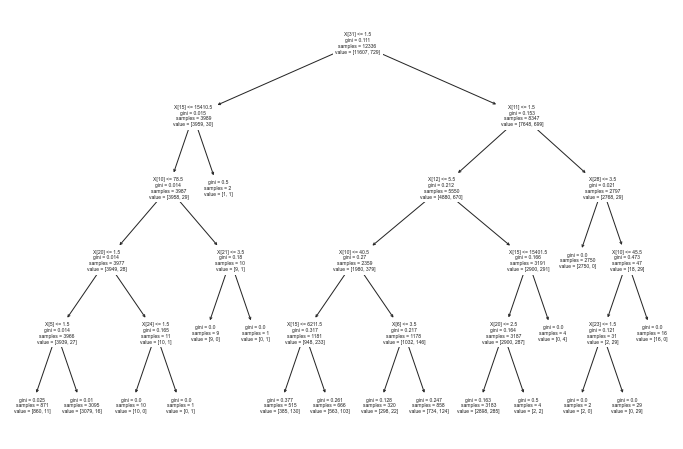

In [48]:
plt.figure(figsize=(12,8))

from sklearn import tree

y_pred_gini = clf_gini.predict(X_test)
tree.plot_tree(clf_gini.fit(X_train, y_train)) 

## Decision Tree for top 5

In [68]:
# Decision tree model
# Decision Tree
clf = DecisionTreeClassifier()

parameters = {'max_depth': [2, 3, 5, 6, 8, 10], 
              'min_samples_split': [10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10, 30],
             }

acc_scorer = make_scorer(accuracy_score)

#grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train1, y_train1)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

clf.fit(X_train1, y_train1)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=10)

In [61]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_leaf=5, min_samples_split=10)


# fit the model
clf_gini.fit(X_train1, y_train1)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=10)

In [62]:
y_pred1 = clf_gini.predict(X_test1)
print('Accuracy of DT classifier on test set: {:.2f}'.format(clf_gini.score(X_test1, y_test1)))

Accuracy of DT classifier on test set: 0.94


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2890
           1       0.00      0.00      0.00       194

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084



/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

[Text(334.8, 362.4, 'X[4] <= 1.5\ngini = 0.111\nsamples = 12336\nvalue = [11607, 729]'),
 Text(167.4, 217.44, 'X[8] <= 15397.0\ngini = 0.015\nsamples = 3989\nvalue = [3959, 30]'),
 Text(83.7, 72.47999999999996, 'gini = 0.014\nsamples = 3984\nvalue = [3955, 29]'),
 Text(251.10000000000002, 72.47999999999996, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(502.20000000000005, 217.44, 'X[0] <= 1.5\ngini = 0.153\nsamples = 8347\nvalue = [7648, 699]'),
 Text(418.5, 72.47999999999996, 'gini = 0.212\nsamples = 5550\nvalue = [4880, 670]'),
 Text(585.9, 72.47999999999996, 'gini = 0.021\nsamples = 2797\nvalue = [2768, 29]')]

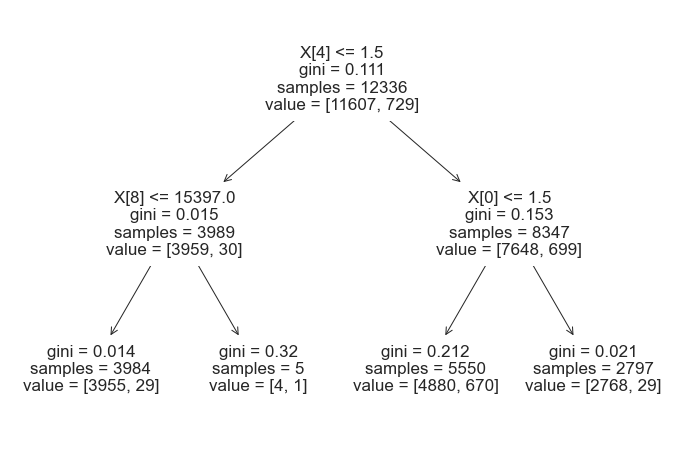

In [73]:
plt.figure(figsize=(12,8))

from sklearn import tree

y_pred_gini = clf_gini.predict(X_test1)
tree.plot_tree(clf_gini.fit(X_train1, y_train1)) 

## Decision Tree for Top 10

In [84]:
# Decision tree model
# Decision Tree
clf = DecisionTreeClassifier()

parameters = {'max_depth': [2, 3, 5, 6, 8, 10], 
              'min_samples_split': [10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10, 30],
             }

acc_scorer = make_scorer(accuracy_score)

#grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train2, y_train2)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

clf.fit(X_train2, y_train2)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=10)

In [64]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_leaf=5, min_samples_split=10)


# fit the model
clf_gini.fit(X_train2, y_train2)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=10)

In [65]:
y_pred2 = clf_gini.predict(X_test2)
print('Accuracy of DT classifier on test set: {:.2f}'.format(clf_gini.score(X_test2, y_test2)))

Accuracy of DT classifier on test set: 0.94


In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2890
           1       0.00      0.00      0.00       194

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084



/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

[Text(334.8, 362.4, 'X[4] <= 1.5\ngini = 0.111\nsamples = 12336\nvalue = [11607, 729]'),
 Text(167.4, 217.44, 'X[8] <= 15397.0\ngini = 0.015\nsamples = 3989\nvalue = [3959, 30]'),
 Text(83.7, 72.47999999999996, 'gini = 0.014\nsamples = 3984\nvalue = [3955, 29]'),
 Text(251.10000000000002, 72.47999999999996, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(502.20000000000005, 217.44, 'X[0] <= 1.5\ngini = 0.153\nsamples = 8347\nvalue = [7648, 699]'),
 Text(418.5, 72.47999999999996, 'gini = 0.212\nsamples = 5550\nvalue = [4880, 670]'),
 Text(585.9, 72.47999999999996, 'gini = 0.021\nsamples = 2797\nvalue = [2768, 29]')]

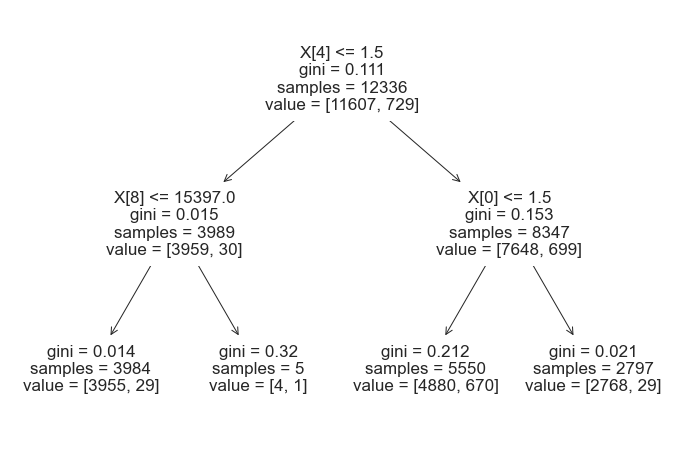

In [89]:
plt.figure(figsize=(12,8))

from sklearn import tree

y_pred_gini = clf_gini.predict(X_test2)
tree.plot_tree(clf_gini.fit(X_train2, y_train2)) 

# Logistic Regression

In [96]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this t

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this t

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.9409046993733906


/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
#logreg = LogisticRegression()
logreg = LogisticRegression(C=0.001, penalty='l2')
logreg.fit(X_train, y_train)

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.001)

In [99]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2890
           1       0.00      0.00      0.00       194

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084



/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

## Logiestic regreesion TOP 10

In [101]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train1,y_train1)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this t

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.9409047650970542


/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.9409047         nan 0.9409047         nan 0.94090477
        nan 0.94058035        nan 0.94082366        nan 0.9409047
        nan 0.94082366]
  warnings.warn(
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs f

In [102]:
#logreg = LogisticRegression()
logreg = LogisticRegression(C=0.1, penalty='l2')
logreg.fit(X_train1, y_train1)

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [103]:
y_pred = logreg.predict(X_test1)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test1, y_test1)))

Accuracy of logistic regression classifier on test set: 0.94


In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2890
           1       0.00      0.00      0.00       194

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084



/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu